**Aluno**: Iago Egias da Silva

**Disciplina:** Reconhecimento de Padrões 2025

**Professor:** Francisco de Assis Boldt


**Desafio:** House Prices - Advanced Regression

# Introdução

Neste notebook aplicaremos técnicas de Aprendizado de Máquina para resolver o desafio **House Prices – Advanced Regression Techniques** do Kaggle.

#Objetivo
Prever o preço de venda `SalePrice` de casas a partir de um conjunto de atributos descritivos.

#Conjunto de Dados
O dataset contém:
- 79 variáveis explicativas sobre dimensões, materiais, condições, vizinhança e outros fatores estruturais.
- Conjunto de treino com valores de `SalePrice`.



#Importação de bibliotecas e Exploração dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Características e estatísticas gerais do conjunto de dados**

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Estatísticas gerais conjunto de dados
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Analisando a quantidade de dados faltantes**

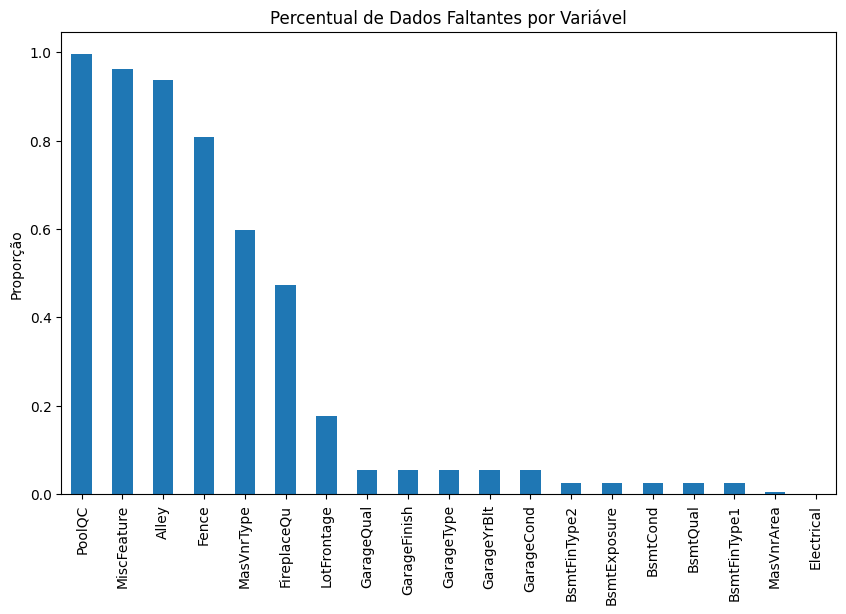

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [ ]:
# Porcentagem de valores faltantes
missing_percent = train.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
missing_percent[missing_percent > 0].plot(kind='bar')
plt.title("Percentual de Dados Faltantes por Variável")
plt.ylabel("Proporção")
plt.show()

missing_percent[missing_percent > 0].head(15)


**Distribuição da variável alvo (SalesPrice)**

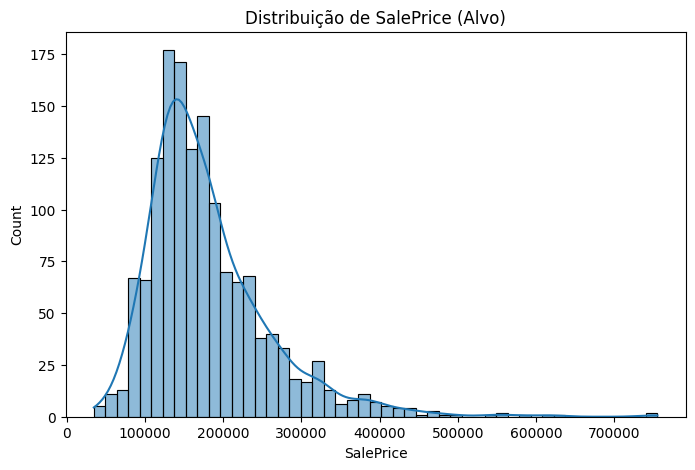

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], kde=True)
plt.title("Distribuição de SalePrice (Alvo)")
plt.show()


**Correlação entre as variáveis**

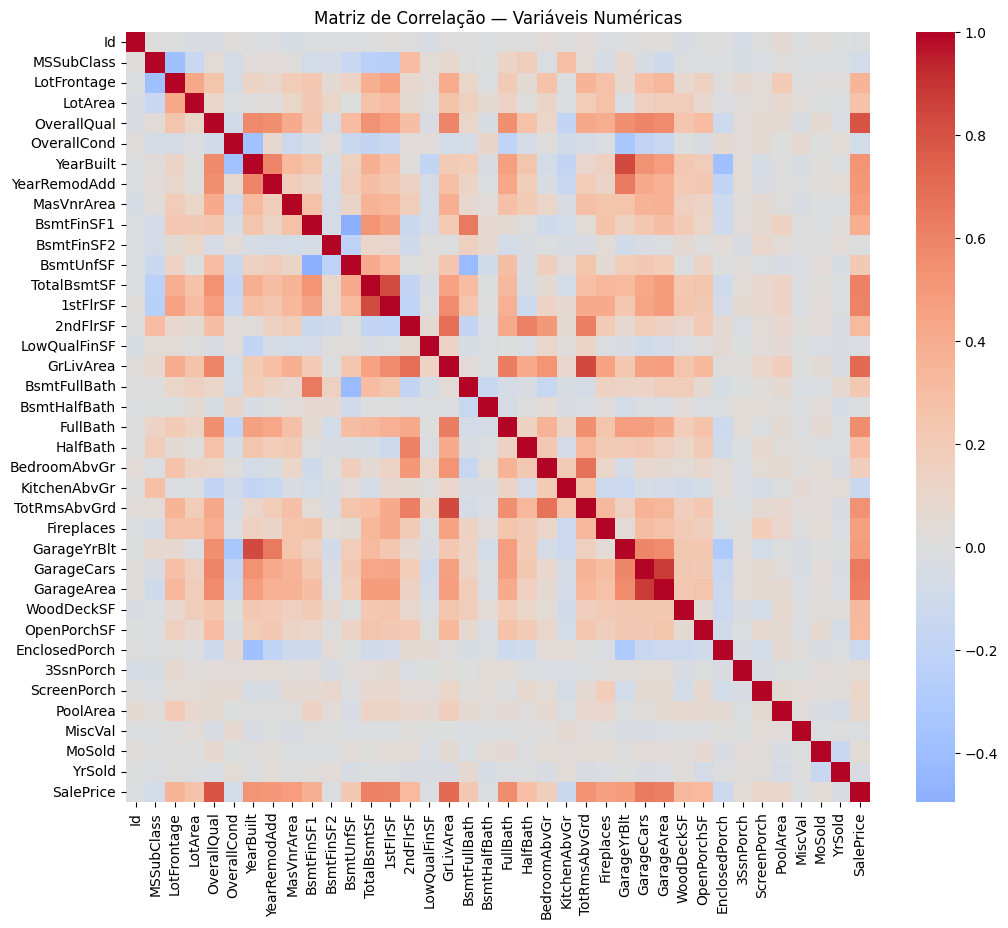

In [ ]:
plt.figure(figsize=(12,10))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação — Variáveis Numéricas")
plt.show()

**Características com mais correlação**

In [ ]:
corr_target = corr["SalePrice"].sort_values(ascending=False)
corr_target.head(15)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


**Características com menos correlação**

In [ ]:
corr_target = corr["SalePrice"].sort_values(ascending=False)
corr_target.tail(15)

,SalePrice
BedroomAbvGr,0.168213
ScreenPorch,0.111447
PoolArea,0.092404
MoSold,0.046432
3SsnPorch,0.044584
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
Id,-0.021917
LowQualFinSF,-0.025606


**Relação entre características importantes e o preço**

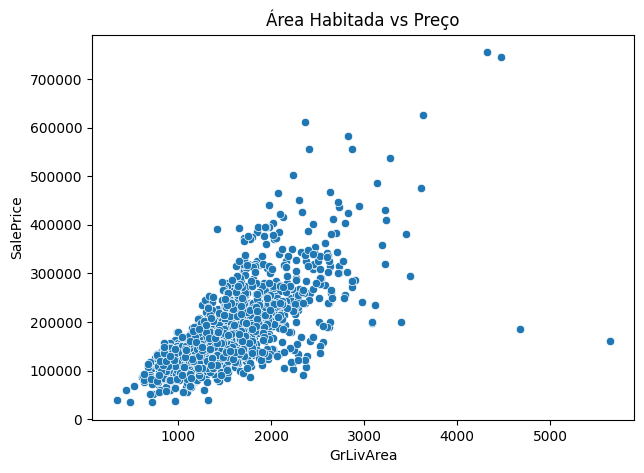

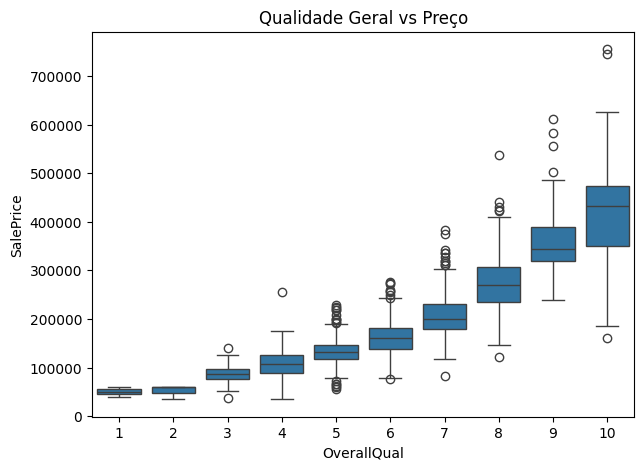

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.title("Área Habitada vs Preço")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x=train["OverallQual"], y=train["SalePrice"])
plt.title("Qualidade Geral vs Preço")
plt.show()

**Análise de Outliers**

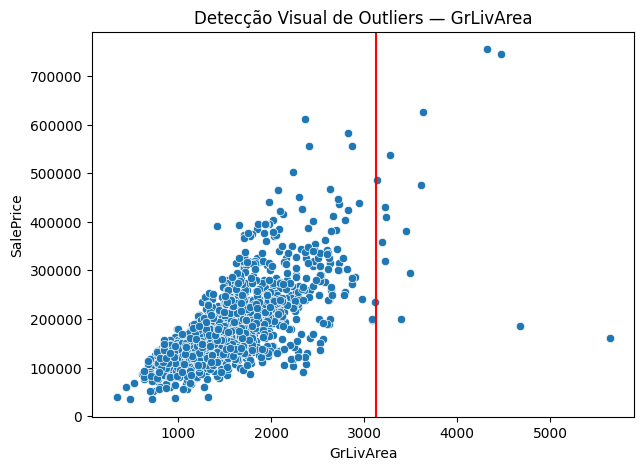

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.axvline(train["GrLivArea"].quantile(0.99), color='red')
plt.title("Detecção Visual de Outliers — GrLivArea")
plt.show()

**Valores faltantes por categoria**

In [ ]:
missing_cols = missing_percent[missing_percent > 0].index

train[missing_cols].isnull().mean().sort_values(ascending=False)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


A exploração inicial dos dados revelou pontos essenciais que orientam diretamente a construção de uma pipeline. A análise de valores faltantes mostrou que algumas variáveis apresentam grande quantidade de dados ausentes, como *PoolQC, MiscFeature, Alley* e *Fence*, indicando a necessidade de estratégias diferenciadas de imputação, possivelmente tratando parte delas como ausência estrutural em vez de valores faltando. A inspeção das distribuições evidenciou que muitas variáveis numéricas possuem assimetrias significativas, o que pode exigir transformações, como log, para melhorar o desempenho de modelos sensíveis a distribuição. Já o exame da correlação entre features mostrou grupos de variáveis altamente correlacionadas, especialmente aquelas relacionadas ao tamanho e qualidade das casas, sugerindo que usar seleção de features ou redução de dimensionalidade pode evitar redundâncias. A visualização de outliers revelou valores extremos em variáveis como GrLivArea, que podem distorcer modelos baseados em distância ou regressão. Em conjunto, essas análises fornecem uma base sólida para definir a pipeline: tratar valores faltantes de forma apropriada, considerar transformações para reduzir assimetrias, lidar com multicolinearidade e avaliar o tratamento de outliers. Assim, a preparação dos dados torna-se orientada pela estrutura real do dataset, garantindo modelos mais estáveis e melhor desempenho preditivo.

# Preparação dos Dados / Pipeline - Random Forest + GridSearchCV

In [ ]:
# Separando features e target
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#identificando os tipos de coluna
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Pipeline para variáveis numéricas:
# - Imputação pela mediana (robusta a outliers)
# - Padronização para normalizar a escala
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para variáveis categóricas:
# - Imputação pelo valor mais frequente
# - OneHotEncoder para transformar categorias em variáveis dummy
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combinar transformações usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

**RandomForest + GridSearch**

In [ ]:
# Modelo base - RandomForest  (Ele é robusto, não exige normalização e lida bem com não-linearidades)
rf = RandomForestRegressor(random_state=42)

# Pipeline completa (pré-processamento + modelo)
# ============================================================
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf)
])

# Definindo a grade de hiperparâmetros para o GridSearch
param_grid_rf = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 20, 40],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["auto", "sqrt"]
}

grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

# Configurando o GridSearchCV

# - cv=5 → validação cruzada com 5 folds
# - scoring → métrica negativa do RMSE (quanto maior, melhor)
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

print("Melhores hiperparâmetros RF:", grid_rf.best_params_)
print("Melhor RMSE CV RF:", -grid_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

Melhores hiperparâmetros RF: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Melhor RMSE CV RF: 30789.05071996691


**Avaliando RandomForest no conjunto de validação**

In [ ]:
preds_valid_rf = best_rf.predict(X_valid)
mse_rf = mean_squared_error(y_valid, preds_valid_rf)
rmse_rf = np.sqrt(mse_rf)

rmse_rf

np.float64(32443.014891000403)

**2) Ridge Regression com GridSearchCV**

In [ ]:
ridge = Ridge()

pipeline_ridge = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", ridge)
])

param_grid_ridge = {
    "model__alpha": [0.1, 1.0, 10.0, 50.0, 150.0]
}

grid_ridge = GridSearchCV(
    estimator=pipeline_ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_

print("Melhores hiperparâmetros Ridge:", grid_ridge.best_params_)
print("Melhor RMSE CV Ridge:", -grid_ridge.best_score_)

Melhores hiperparâmetros Ridge: {'model__alpha': 10.0}
Melhor RMSE CV Ridge: 32585.456980970303


**Avaliando Ridge no conjunto de validação**

In [ ]:
preds_valid_ridge = best_ridge.predict(X_valid)
mse_ridge = mean_squared_error(y_valid, preds_valid_ridge)
rmse_ridge = np.sqrt(mse_ridge)
rmse_ridge

np.float64(30655.232540317746)

**Comparação Final entre Modelos**

In [ ]:
print("RMSE Random Forest:", rmse_rf)
print("RMSE Ridge:", rmse_ridge)

RMSE Random Forest: 32443.014891000403
RMSE Ridge: 30655.232540317746


**Geração da Submissão com o Melhor Modelo**

In [ ]:
best_model = best_rf if rmse_rf < rmse_ridge else best_ridge

preds_test = best_model.predict(test)
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": preds_test
})

submission.to_csv("submission.csv", index=False)
submission.head()

,Id,SalePrice
0,1461,102936.329738
1,1462,149616.206601
2,1463,168267.779936
3,1464,187306.865115
4,1465,208391.501877


O pipeline desenvolvido organiza todo o processo de preparação e modelagem para o conjunto de dados House Prices. As variáveis numéricas foram tratadas com imputação pela mediana e padronização, enquanto as variáveis categóricas passaram por imputação pelo valor mais frequente e codificação por OneHotEncoder. Essas etapas foram integradas com ColumnTransformer, garantindo que cada tipo de dado recebesse o tratamento adequado dentro de um fluxo único e reprodutível. Em seguida, utilizou se RandomForest como modelo base e aplicou se GridSearchCV para testar diferentes combinações de hiperparametros com validação cruzada, buscando a configuração que resultasse no menor erro. O pipeline final, ajustado com os melhores parâmetros, foi usado para gerar as previsões e criar o arquivo de submissão. O processo garante organização, reprodutibilidade e um modelo mais robusto ao combinar pré processamento consistente e otimização sistemática do desempenho.

**Validação da submissão**

In [ ]:
# Garantir que não existem preços negativos
if (submission['SalePrice'] < 0).any():
    submission['SalePrice'] = submission['SalePrice'].clip(lower=0)

# Remover linhas com NaN (idealmente nunca deveria haver)
na_count = submission['SalePrice'].isna().sum()
if na_count > 0:
    submission = submission.dropna()

print(f"\nShape da submissão: {submission.shape}")

print("\nPrimeiras 10 linhas:")
print(submission.head(10).to_string(index=False))

print("\nEstatísticas de preço:")
print(f"  Min: ${submission['SalePrice'].min():,.2f}")
print(f"  Max: ${submission['SalePrice'].max():,.2f}")
print(f"  Média:    ${submission['SalePrice'].mean():,.2f}")
print(f"  Mediana:  ${submission['SalePrice'].median():,.2f}")
print(f"  Desvio-Padrão: ${submission['SalePrice'].std():,.2f}")


Shape da submissão: (1459, 2)

Primeiras 10 linhas:
  Id     SalePrice
1461 102936.329738
1462 149616.206601
1463 168267.779936
1464 187306.865115
1465 208391.501877
1466 168225.803215
1467 177018.157087
1468 155277.275174
1469 200669.402867
1470 113371.449610

Estatísticas de preço:
  Min: $13,441.73
  Max: $517,915.23
  Média:    $175,986.87
  Mediana:  $159,378.31
  Desvio-Padrão: $75,063.06


**Gráficos finais de validação**

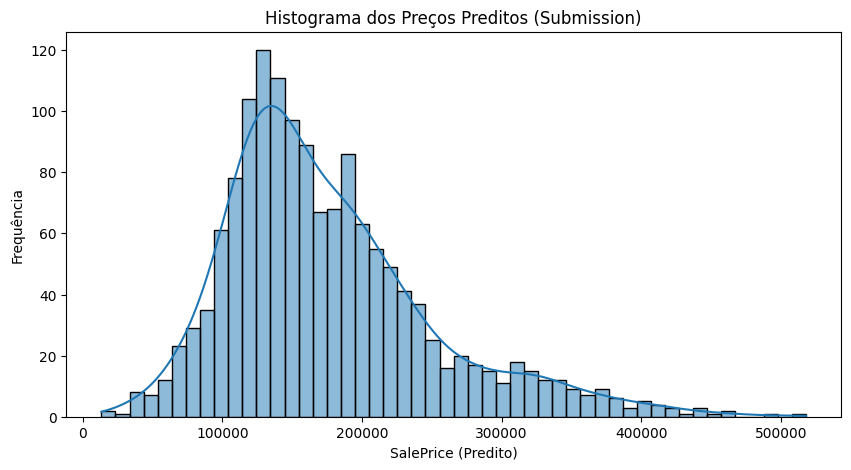

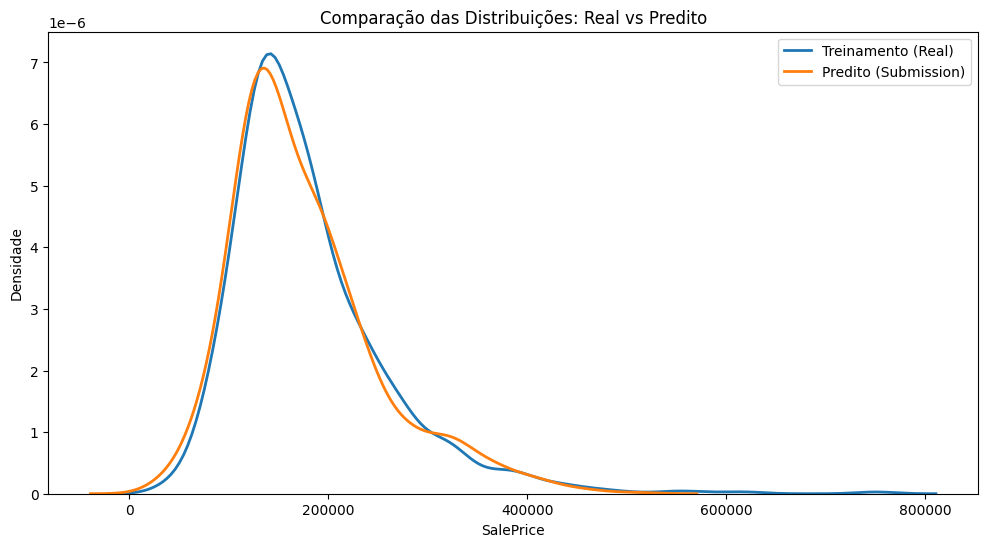

In [ ]:
# -------------------------------------------------------------------
# 1. HISTOGRAMA DOS PREÇOS PREVISTOS
# -------------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(submission['SalePrice'], bins=50, kde=True)
plt.title("Histograma dos Preços Preditos (Submission)")
plt.xlabel("SalePrice (Predito)")
plt.ylabel("Frequência")
plt.show()

# -------------------------------------------------------------------
# 2. COMPARAÇÃO ENTRE DISTRIBUIÇÃO REAL (TRAIN) E PREVISTA (PREDICTIONS)
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.kdeplot(train['SalePrice'], label="Treinamento (Real)", linewidth=2)
sns.kdeplot(submission['SalePrice'], label="Predito (Submission)", linewidth=2)
plt.title("Comparação das Distribuições: Real vs Predito")
plt.xlabel("SalePrice")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# Conclusão

A partir da análise exploratória inicial, foi possível identificar padrões relevantes no conjunto de dados, como a forte influência de variáveis estruturais e de qualidade da construção sobre o preço das casas, além da presença de outliers e valores faltantes em diversas colunas. Esses achados orientaram a construção da pipeline de pré processamento, combinando imputação apropriada, padronização e codificação de variáveis categóricas.

Em seguida, duas abordagens de modelagem foram avaliadas: Random Forest, representando um método não linear e robusto, e Ridge Regression, como modelo linear regularizado. Para ambos, realizou se uma busca de hiperparâmetros via GridSearchCV, garantindo uma seleção sistemática e baseada em validação cruzada.

Os resultados mostraram que, ao contrário do esperado para muitos problemas de precificação, o modelo Ridge Regression apresentou desempenho superior ao Random Forest, obtendo o menor RMSE no conjunto de validação. Esse achado sugere que, apesar da complexidade do dataset, as relações entre as variáveis e o preço das casas podem ser razoavelmente bem capturadas por uma combinação linear regularizada. Ainda assim, a inclusão do Random Forest foi metodologicamente importante para oferecer um contraponto não linear e reforçar a comparação entre modelos de naturezas distintas.

As visualizações finais mostraram que a distribuição dos preços previstos é coerente com a distribuição real, embora apresente menor variabilidade, comportamento típico em modelos lineares regularizados. A comparação entre valores reais e previstos indicou que o Ridge captura adequadamente a tendência central dos preços, ainda que suavize valores extremos, o que se refletiu também no desempenho do Random Forest.

De forma geral, o pipeline desenvolvido apresentou resultados consistentes e alinhados com expectativas para o problema de precificação residencial. O desempenho observado indica que o modelo é capaz de generalizar de maneira satisfatória, ao mesmo tempo em que os gráficos de validação e o RMSE obtido destacam caminhos claros para aprimoramentos futuros, como uma engenharia de atributos mais profunda, tratamento criterioso de outliers e experimentação com modelos mais avançados ou com tuning mais agressivo.